# Install

In [ ]:
# !apt-get install wget unzip

In [162]:
from google.colab import drive
import gdown
import zipfile
import numpy as np
import pandas as pd
import pickle
from pathlib import Path
import os
import warnings

import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import decomposition

from mpl_toolkits.mplot3d import Axes3D


# DataSet

## alternative way

In [ ]:
# drive.mount('/content/gdrive') #, force_remount=True)

In [ ]:
# # потребує правильного монтування та налаштування доступу до теки

# SAVED_DATAFRAME_BASE = Path("/content/drive/MyDrive/ColabNotebooks/") #base
# URL = 'https://drive.usercontent.google.com/download?id=1Zvz20Iqeia1eEtFbGa3NcIrt_SNSimP6'

# OUTPUT = Path("/content/drive/MyDrive/ColabNotebooks/data.zip") #save archive
# CSV_DATA_PATH = Path("/content/drive/MyDrive/ColabNotebooks/data") #path unzip

## unzip

In [ ]:

SAVED_DATAFRAME_BASE = Path("/content/") #base
URL = "https://drive.usercontent.google.com/download?id=1Zvz20Iqeia1eEtFbGa3NcIrt_SNSimP6&export=download&authuser=0"

OUTPUT = Path("/content/data.zip") #save archive
CSV_DATA_PATH = Path("/content/data") #path unzip


In [ ]:
if not OUTPUT.is_file():
  !wget -q -O URL

if OUTPUT.is_file() and not CSV_DATA_PATH.is_dir():
  !unzip -q -o $OUTPUT

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [ ]:
import logging
def download_and_unzip_data():
    try:
        logging.info(f"Завантаження файлу з {URL} та збереження його в {OUTPUT}")
        gdown.download(URL, OUTPUT, quiet=False)

        logging.info(f"Розпаковка архіву {OUTPUT} в {CSV_DATA_PATH}")

        if not CSV_DATA_PATH.is_dir():
            os.makedirs(CSV_DATA_PATH)

        with zipfile.ZipFile(OUTPUT, 'r') as zip_ref:
            zip_ref.extractall(CSV_DATA_PATH)
        logging.info("Завантаження та розпакування успішні.")
    except Exception as e:
        logging.error(f"Виникла помилка: {e}")

if not OUTPUT.is_file():
    logging.info(f"Файл {OUTPUT} не знайдено. Завантажуємо його.")
    !wget -O $OUTPUT $URL

if OUTPUT.is_file() and not CSV_DATA_PATH.is_dir():
    logging.info(f"Розпаковка архіву {OUTPUT} в {CSV_DATA_PATH}")
    !unzip -q -o $OUTPUT -d $CSV_DATA_PATH

--2024-02-11 20:28:01--  https://drive.usercontent.google.com/download?id=1Zvz20Iqeia1eEtFbGa3NcIrt_SNSimP6
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.0.65, 2607:f8b0:4025:810::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116175 (113K) [application/octet-stream]
Saving to: ‘/content/data.zip’

/content/data.zip   100%[===================>] 113.45K  --.-KB/s    in 0.05s   

2024-02-11 20:28:02 (2.27 MB/s) - ‘/content/data.zip’ saved [116175/116175]



In [ ]:

df_2d = pd.read_csv(CSV_DATA_PATH.joinpath("data/data_2d.csv"), header=None ,names=["X","Y","Z"])
df_2d.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       200 non-null    float64
 1   Y       200 non-null    float64
 2   Z       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [ ]:

file_path = "data/data/mnist.csv"
df_mn = pd.read_csv(file_path, header=None)
df_mn = df_mn.iloc[:, 1:]
df_mn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 784 entries, 1 to 784
dtypes: int64(784)
memory usage: 3.0 MB


# **df_2d**

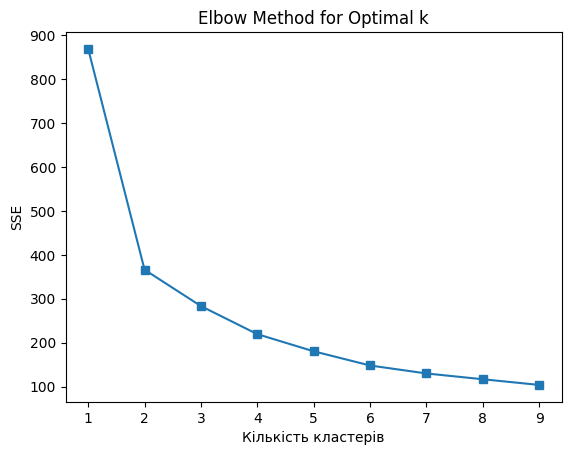

In [124]:
k_range = np.arange(1, 10)

sse = []

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) #n_init=10
  kmeans.fit(df_2d)
  sse.append(kmeans.inertia_)

plt.plot(k_range, sse, marker='s')
plt.xlabel("Кількість кластерів")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal k")
plt.show()


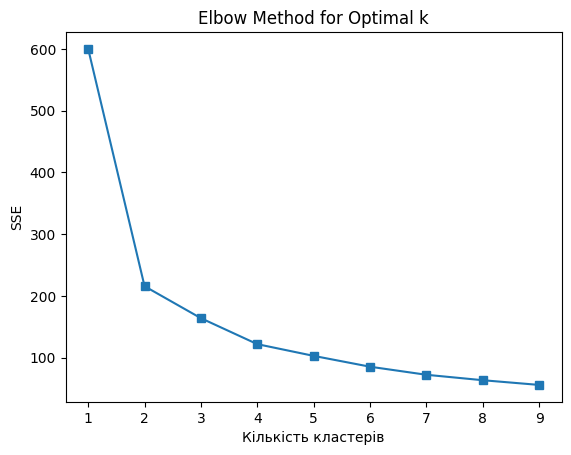

In [123]:
scaler = StandardScaler()
df_2d_scaled = scaler.fit_transform(df_2d)

k_range = np.arange(1, 10)
sse = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_2d_scaled)
    sse.append(kmeans.inertia_)

plt.plot(k_range, sse, marker='s')
plt.xlabel("Кількість кластерів")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal k")
plt.show()

In [ ]:
k = 2

if not isinstance(k, int) or k <= 0:
  raise ValueError("k > 0")
if df_2d.shape[0] < k:
  raise ValueError("k <= Q rows df_2d")

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(df_2d)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print(f"Мітки кластерів:\n{labels}")
print(f"Центри кластерів:\n{centroids}")


Мітки кластерів:
[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Центри кластерів:
[[0.06185567 0.99733162 0.83427624]
 [0.91262136 2.47607733 3.50850036]]


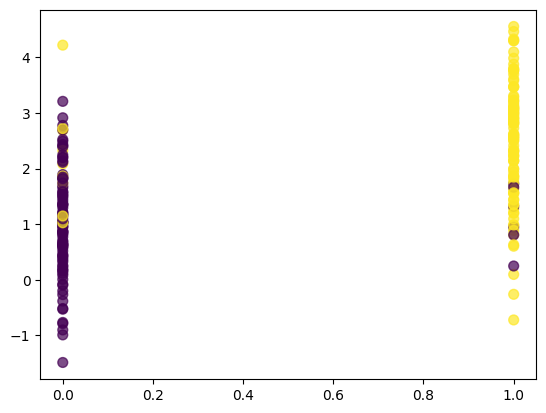

Силуетний коефіцієнт: 0.4837633008608806


In [ ]:

from sklearn.metrics import silhouette_score

plt.scatter(df_2d["X"], df_2d["Y"], c=labels[:200], s=50, alpha=0.7)
plt.show()

silhouette_score = silhouette_score(df_2d, labels[:200])
print(f"Силуетний коефіцієнт: {silhouette_score}")


**силуетний коефіцієнт прямує до 1 - чим вище тим краща кластеризація**

Мітки кластерів:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Центри кластерів:
[[ 1.          0.56518053  0.82493211]
 [-0.96078431 -0.54301659 -0.79258183]]


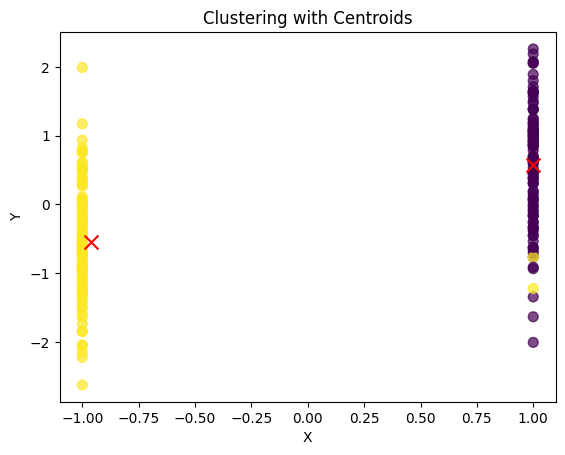

Силуетний коефіцієнт: 0.5671182203740045


In [126]:
k = 2
if not isinstance(k, int) or k <= 0:
    raise ValueError("k > 0")
if df_2d_scaled.shape[0] < k:
    raise ValueError("k <= Q rows df_2d")

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(df_2d_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print(f"Мітки кластерів:\n{labels}")
print(f"Центри кластерів:\n{centroids}")

plt.scatter(df_2d_scaled[:, 0], df_2d_scaled[:, 1], c=labels, s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Clustering with Centroids")
plt.show()

silhouette_score = silhouette_score(df_2d_scaled, labels)
print(f"Силуетний коефіцієнт: {silhouette_score}")

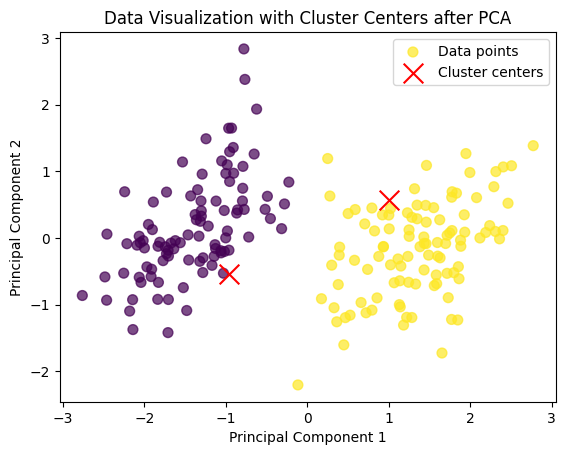

In [130]:
scaler = StandardScaler()
df_2d_scaled = scaler.fit_transform(df_2d)

# зменшуємо розмірність з використанням PCA (2 вимірний)
pca = PCA(n_components=2)
df_2d_pca = pca.fit_transform(df_2d_scaled)

plt.scatter(df_2d_pca[:, 0], df_2d_pca[:, 1], c=labels[:200], s=50, alpha=0.7, label='Data points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Cluster centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Visualization with Cluster Centers after PCA')
plt.legend()
plt.show()

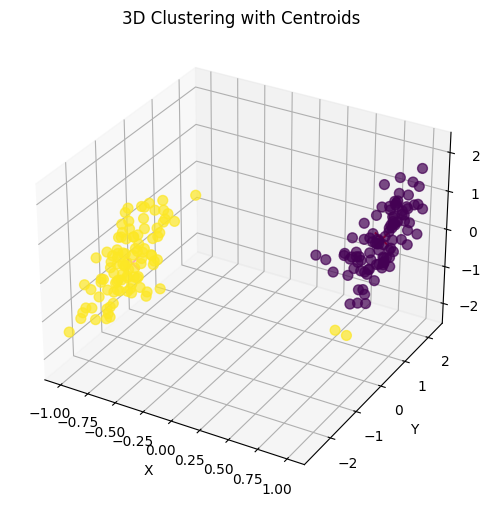

In [127]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_2d_scaled[:, 0],
           df_2d_scaled[:, 1],
           df_2d_scaled[:, 2],
           c=labels, s=50, alpha=0.7)
ax.scatter(centroids[:, 0],
           centroids[:, 1],
           centroids[:, 2],
           c='red', marker='x', s=100)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Clustering with Centroids')
plt.show()

## Checking the values for the variable k

Gap statistic

In [ ]:

def generate_null_data(n_samples, n_features, n_clusters, cluster_std):
    null_data = []
    for _ in range(n_samples):
        X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, cluster_std=cluster_std)
        null_data.append(X)
    return null_data

# сума квадратів внутрішньокластерних відстаней
def compute_inertia(data):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data)
    return kmeans.inertia_

B = 10
null_data = generate_null_data(len(df_2d), 2, k, 1.0)

original_inertia = compute_inertia(df_2d)
null_inertias = [compute_inertia(null_set) for null_set in null_data]

gap = (1 / B) * sum(np.log(null_inertias)) - np.log(original_inertia)

print("Gap statistic:", gap)


Gap statistic: 113.45060319671514


Перехресна валідація

In [ ]:

k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_2d)
    silhouette_avg = silhouette_score(df_2d, labels)
    print(f"Силуетний коефіцієнт для k={k}: {silhouette_avg}")

Силуетний коефіцієнт для k=2: 0.4837633008608806
Силуетний коефіцієнт для k=3: 0.3717324043618481
Силуетний коефіцієнт для k=4: 0.3637417432202369
Силуетний коефіцієнт для k=5: 0.3346288934175049
Силуетний коефіцієнт для k=6: 0.3534183406987651
Силуетний коефіцієнт для k=7: 0.3500881032849897
Силуетний коефіцієнт для k=8: 0.33887629131329505
Силуетний коефіцієнт для k=9: 0.33242602890230294
Силуетний коефіцієнт для k=10: 0.34452879019059496


Дистанція між центрами кластерів

In [ ]:
from scipy.spatial.distance import euclidean

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(df_2d)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
k = centroids.shape[0]

for i in range(k):
    for j in range(i+1, k):
        distance = euclidean(centroids[i], centroids[j])
        print(f"Відстань між кластерами {i} та {j}: {distance}")


Відстань між кластерами 0 та 1: 3.1720601761016423


# **MNIST**

In [ ]:
df_mnist = pd.read_csv(file_path, header=None)

In [ ]:
df_mnist.head()
# df_mnist.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


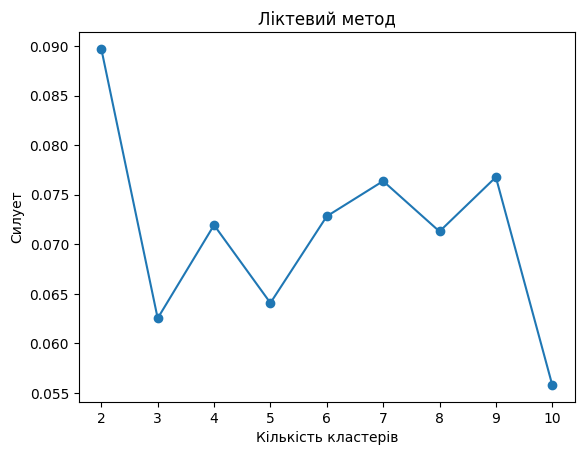

In [121]:
data = df_mnist.drop(0, axis=1).values
labels = df_mnist[0].values

k_range = range(2, 11)

results = {}

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=30)

    kmeans.fit(data)
    labels_pred = kmeans.labels_
    silhouette = silhouette_score(data, labels_pred)
    results[k] = silhouette

plt.plot(k_range, list(results.values()), marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силует')
plt.title('Ліктевий метод')
plt.show()


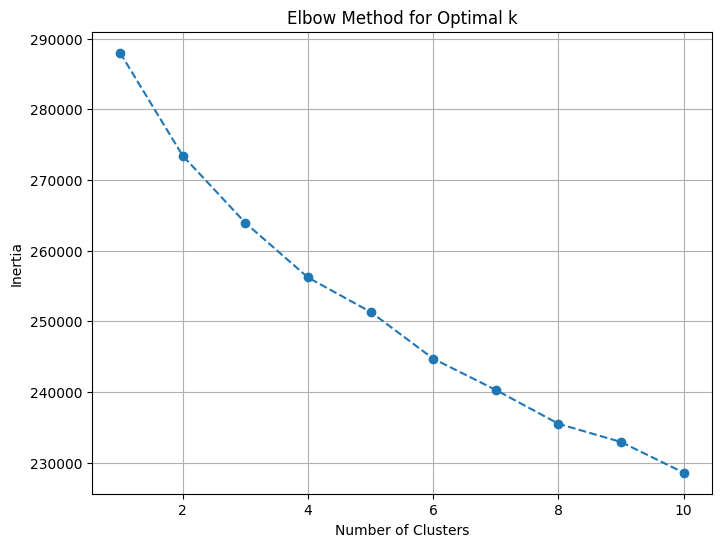

In [120]:
points = df_mnist

scaler = StandardScaler()
points_scaled = scaler.fit_transform(points)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(points_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

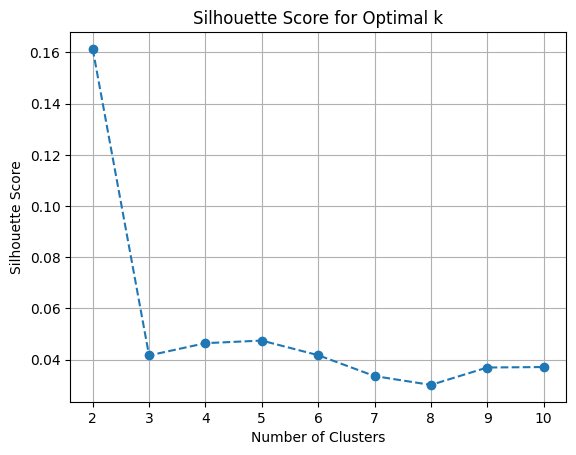

In [159]:
labels = df_mnist[0].values
points_scaled = scaler.fit_transform(points)

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(points_scaled)
    labels_pred = kmeans.labels_
    silhouette_value = silhouette_score(points_scaled, labels_pred)  # ім'я змінної
    silhouette_scores.append(silhouette_value)

plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid()
plt.show()


In [160]:
silhouette_scores

[0.16135434692824002,
 0.04163690580791421,
 0.04642751422629499,
 0.04743841631475392,
 0.04173294130089286,
 0.03358110014186043,
 0.030119525535480782,
 0.03692385293498481,
 0.037105240803002856]

Використання n_init='auto' не дає розуміння фактичної кількості спроб використаних для к.

додавання циклу, тільки збільшує обчислення в десятки разів

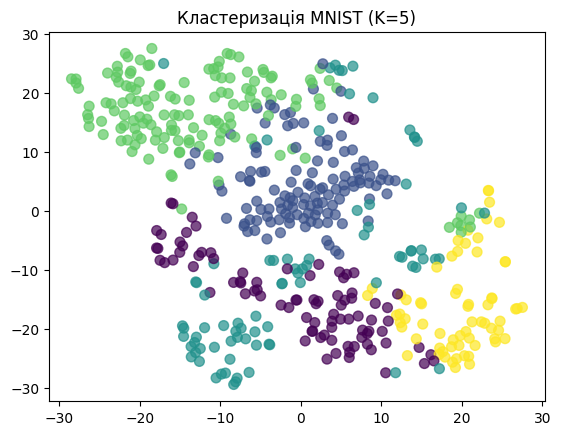

Оптимальна K: 5
Силует для оптимальної K: 0.07104186037860856
Точність для оптимальної K: 0.234


In [ ]:

# відокремлюємо дані від мітки за першим стовпцем
data = df_mnist.drop(0, axis=1).values
labels = df_mnist[0].values


# k_range = range(2, 11) # вибір оптимальної
k_range = [5] # ручне встановлення

results = {}

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

  kmeans.fit(data)
  labels_pred = kmeans.labels_
  silhouette = silhouette_score(data, labels_pred)

  accuracy = accuracy_score(labels, labels_pred)

  results[k] = {'silhouette': silhouette, 'accuracy': accuracy}

best_k = max(results, key=lambda k: results[k]['silhouette'])

best_silhouette = results[best_k]['silhouette']
best_accuracy = results[best_k]['accuracy']

# Зменшуємо розмірність
tsne_model = TSNE(n_components=2, random_state=42)
tsne_data = tsne_model.fit_transform(data)

plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels_pred, s=50, alpha=0.7)
plt.title(f"Кластеризація MNIST (K={best_k})")
plt.show()

print(f"Оптимальна K: {best_k}")
print(f"Силует для оптимальної K: {best_silhouette}")
print(f"Точність для оптимальної K: {best_accuracy}")

## Checking the values for the variable k


перехресна валідація

In [ ]:
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(df_mnist)
    silhouette_avg = silhouette_score(df_mnist, labels)
    accuracy = accuracy_score(df_mnist[0], labels)

    print(f"Силуетний коефіцієнт для k={k}: {silhouette_avg} Точність: {accuracy}")

Силуетний коефіцієнт для k=2: 0.08977257572748384 Точність: 0.212
Силуетний коефіцієнт для k=3: 0.06603658827501734 Точність: 0.188
Силуетний коефіцієнт для k=4: 0.06213913409945481 Точність: 0.296
Силуетний коефіцієнт для k=5: 0.07104225749375356 Точність: 0.234
Силуетний коефіцієнт для k=6: 0.06438752995800896 Точність: 0.236
Силуетний коефіцієнт для k=7: 0.06382246208798523 Точність: 0.03
Силуетний коефіцієнт для k=8: 0.0644709301112748 Точність: 0.16
Силуетний коефіцієнт для k=9: 0.06364090573533136 Точність: 0.04
Силуетний коефіцієнт для k=10: 0.06294249430730767 Точність: 0.034


Gap statistic

In [ ]:
warnings.filterwarnings("ignore")
def calculate_gap_statistic(data, labels, centroids):
    # інерція для реальних даних
    real_inertia = KMeans(n_clusters=len(centroids), init=centroids).fit(data).inertia_

    # генеруємо випадкові дані
    random_inertia = []
    for _ in range(10):
        random_data = np.random.random_sample(size=data.shape)
        random_kmeans = KMeans(n_clusters=len(centroids), init=centroids).fit(random_data)
        random_inertia.append(random_kmeans.inertia_)

    gap = np.mean(np.log(random_inertia)) - np.log(real_inertia)

    return gap

# best_k = 5

kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init='auto').fit(data)
labels_pred_best = kmeans_best.labels_
centroids_best = kmeans_best.cluster_centers_

gap_statistic = calculate_gap_statistic(data, labels_pred_best, centroids_best)
print("Gap statistic:", gap_statistic)
print("best_k:", best_k)

Gap statistic: -10.608677212431372
best_k: 5


Дистанція між центрами кластерів

In [ ]:
def calculate_cluster_centers_distance(centroids):
    distances = []
    for i in range(len(centroids)):
        for j in range(i+1, len(centroids)):
            distance = euclidean(centroids[i], centroids[j])
            distances.append(distance)
    return distances

kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init='auto').fit(data)
centroids_best = kmeans_best.cluster_centers_

centroid_distances = calculate_cluster_centers_distance(centroids_best)
print("Дистанція між центрами кластерів для", best_k, "кластерів:", centroid_distances)
print("Кількість кластерів:", best_k)


Дистанція між центрами кластерів для 5 кластерів: [1249.8281715075857, 1054.592104079254, 1138.3122710785165, 1189.8356804983318, 1088.8752485765112, 1207.338054528281, 1625.2021149917252, 1151.4283734260534, 1177.320129317516, 1382.6071201925733]
Кількість кластерів: 5


In [ ]:
centroid_distances

[1249.8281715075857,
 1054.592104079254,
 1138.3122710785165,
 1189.8356804983318,
 1088.8752485765112,
 1207.338054528281,
 1625.2021149917252,
 1151.4283734260534,
 1177.320129317516,
 1382.6071201925733]

## Cluster centers & PCA

In [ ]:
k = 5

if not isinstance(k, int) or k <= 0:
  raise ValueError("k > 0")
if df_mnist.shape[0] < k:
  raise ValueError("k <= Q rows df_mnist")

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(df_mnist)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print(f"Мітки кластерів:\n{labels}")
print(f"Центри кластерів:\n{centroids}")


Мітки кластерів:
[2 3 4 1 0 4 0 0 1 2 1 1 2 1 4 3 0 2 3 0 2 3 0 3 0 1 0 0 1 4 3 4 3 1 2 1 2
 4 4 4 4 2 0 4 4 3 4 2 0 0 3 3 3 3 1 3 0 4 0 4 0 2 0 2 2 0 1 0 3 1 2 1 1 2
 4 2 3 2 2 2 0 1 1 0 0 0 2 3 1 4 3 2 2 3 4 0 4 2 1 0 2 1 3 0 0 0 1 4 0 2 3
 4 4 0 2 2 0 0 2 2 3 2 0 2 2 0 1 2 3 3 1 1 3 2 3 4 1 4 1 2 2 0 3 4 2 4 2 1
 1 4 0 0 2 3 4 2 0 1 3 4 0 1 3 0 2 3 0 4 4 0 0 2 3 3 2 4 4 3 4 3 4 3 2 1 3
 0 3 3 1 4 4 4 1 0 1 4 4 2 0 2 3 1 4 4 4 3 0 3 1 0 0 2 0 4 0 1 3 2 2 3 0 1
 1 2 4 1 3 2 4 2 4 4 3 2 2 0 2 2 0 4 3 3 2 0 4 4 1 2 0 4 0 4 0 3 0 2 4 4 1
 1 2 4 0 2 0 4 3 4 3 1 3 1 4 0 0 0 4 2 1 4 3 2 2 2 0 2 2 0 4 3 0 3 0 2 1 0
 1 1 1 3 4 2 4 2 2 1 4 2 2 3 3 1 1 3 4 0 4 2 1 3 4 2 0 4 1 2 4 1 2 4 4 3 4
 3 3 3 0 0 3 1 4 0 4 3 3 4 3 3 4 0 4 3 1 1 4 2 3 4 0 0 0 0 2 4 3 3 2 3 3 3
 0 4 1 3 3 3 0 4 4 0 1 0 3 2 1 4 3 2 4 0 1 2 2 4 2 3 2 3 0 0 1 3 3 2 2 0 1
 1 3 4 0 2 3 0 0 0 4 2 2 4 2 1 0 2 1 0 2 4 2 2 4 3 0 2 0 2 2 3 2 3 1 1 3 3
 2 1 1 2 2 3 3 3 4 3 0 4 4 3 2 1 2 0 1 1 2 3 2 2 2 3 3 2 1 4 3 0 4 1 3 3 4
 0 0 4 0

In [ ]:

pca = decomposition.PCA(0.95)
df_mnist_pca = pca.fit_transform(df_mnist)
print(f"{len(pca.components_)=}")
print(f"{df_mnist_pca.shape=}")


len(pca.components_)=114
df_mnist_pca.shape=(500, 114)



PCA

зменшенням розмірності до 2


In [ ]:

pca = PCA(n_components=2)
df_mnist_pca = pca.fit_transform(df_mnist.drop(0, axis=1))

# кластери на зменшених даних
kmeans_best_pca = KMeans(n_clusters=best_k, random_state=42, n_init='auto').fit(df_mnist_pca)
labels_pred_best_pca = kmeans_best_pca.labels_
centroids_best_pca = kmeans_best_pca.cluster_centers_

centroid_distances_pca = calculate_cluster_centers_distance(centroids_best_pca)

print("Дистанція між центрами кластерів для", best_k, "кластерів (після PCA):", centroid_distances_pca)
print("Кількість кластерів (після PCA):", best_k)


Дистанція між центрами кластерів для 5 кластерів (після PCA): [984.3136701573521, 804.5800568587764, 794.0815148544718, 1057.849852402168, 1788.8931694036708, 858.5963758301621, 1501.7282134517359, 1407.4899025869552, 1275.5302364907157, 653.6116991760288]
Кількість кластерів (після PCA): 5


In [ ]:
centroid_distances_pca

[984.3136701573521,
 804.5800568587764,
 794.0815148544718,
 1057.849852402168,
 1788.8931694036708,
 858.5963758301621,
 1501.7282134517359,
 1407.4899025869552,
 1275.5302364907157,
 653.6116991760288]

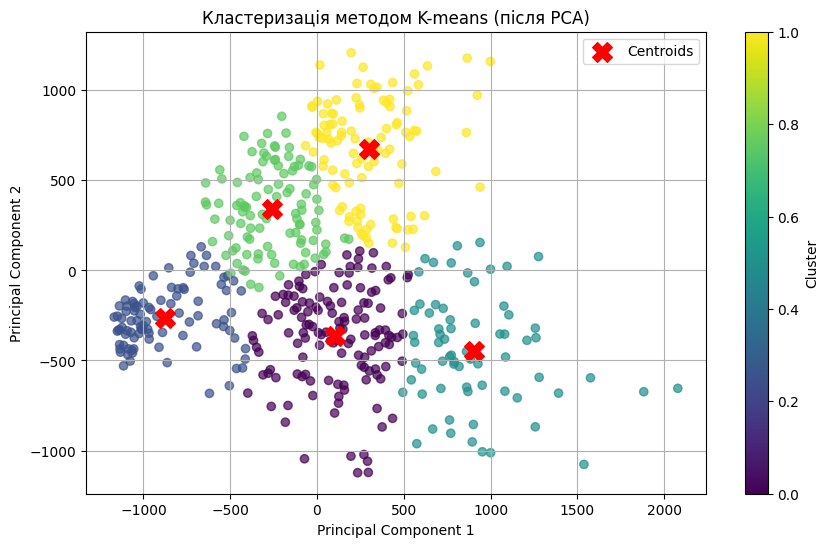

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(df_mnist_pca[:, 0],
            df_mnist_pca[:, 1],
            c=labels_pred_best_pca,
            cmap='viridis', alpha=0.7)
plt.scatter(centroids_best_pca[:, 0],
            centroids_best_pca[:, 1],
            c='red', marker='X', s=200,
            label='Centroids')
plt.title('Кластеризація методом K-means (після PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


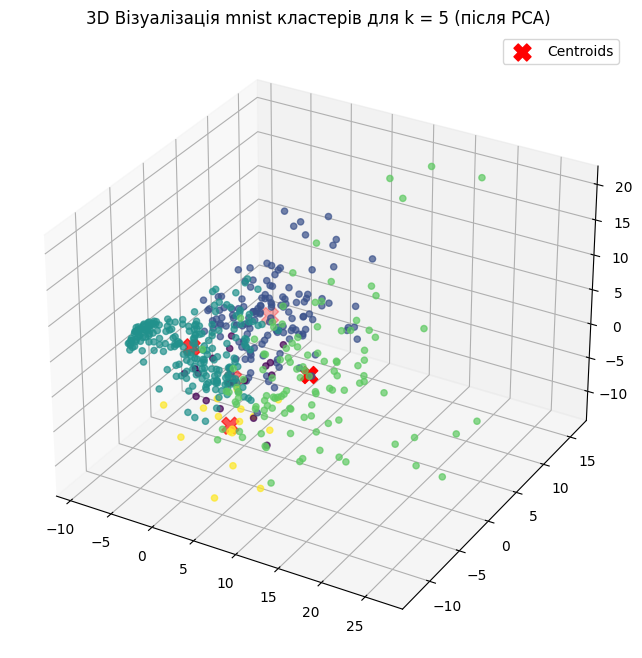

In [145]:
scaler = StandardScaler()
points_scaled = scaler.fit_transform(df_mnist.drop(0, axis=1))

best_k = 5

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
kmeans.fit(points_scaled)
labels_pred = kmeans.labels_

pca = PCA(n_components=3)
points_pca = pca.fit_transform(points_scaled)

# 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points_pca[:, 0],
           points_pca[:, 1],
           points_pca[:, 2],
           c=labels_pred, cmap='viridis', alpha=0.7)

centroids_pca = pca.transform(kmeans.cluster_centers_)
ax.scatter(centroids_pca[:, 0],
           centroids_pca[:, 1],
           centroids_pca[:, 2],
           c='red', marker='X', s=150, label='Centroids')

# ax.set_xlabel('Component 1')
# ax.set_ylabel('Component 2')
# ax.set_zlabel('Component 3')
ax.set_title('3D Візуалізація mnist кластерів для k = 5 (після PCA)')
plt.legend()
plt.show()

## Images category

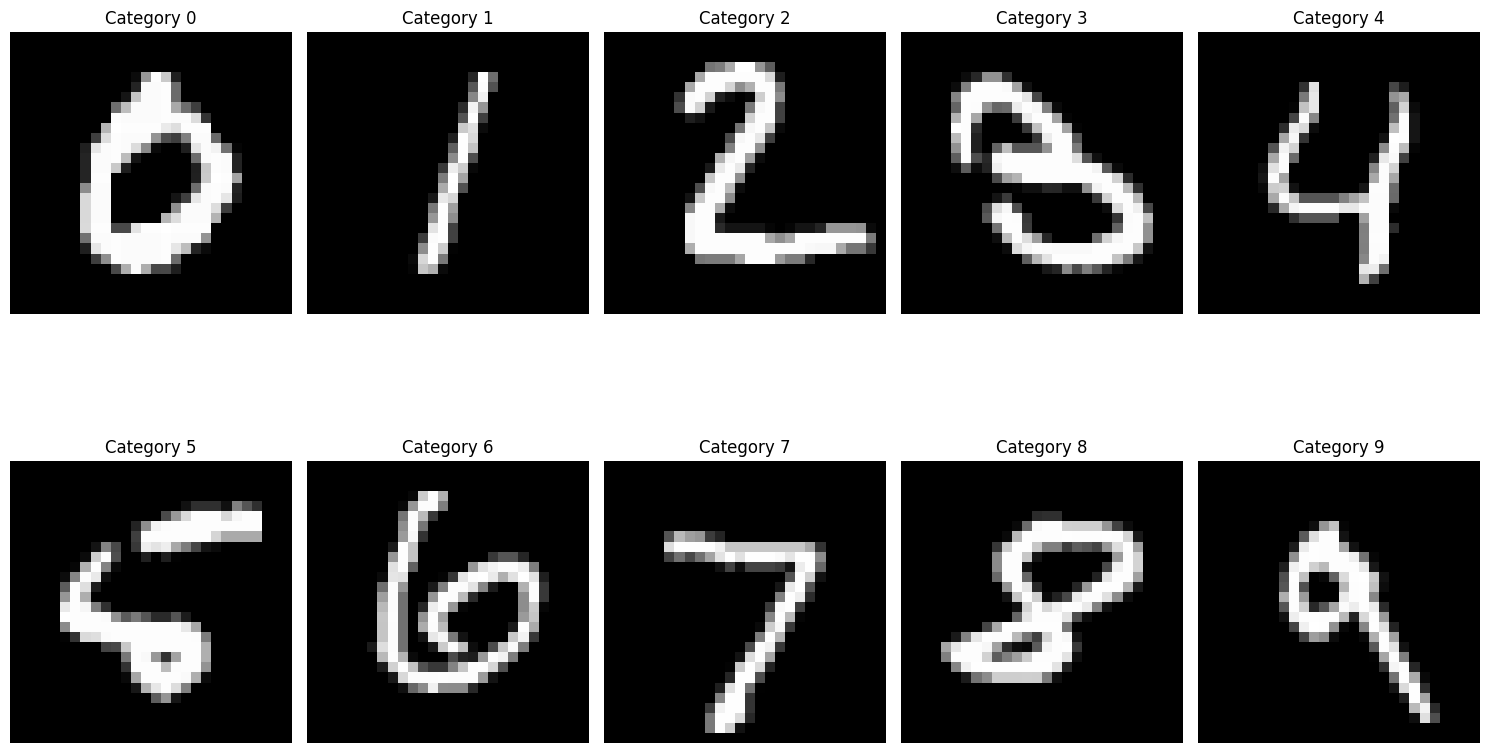

In [ ]:

categories = df_mnist[0].unique()

plt.figure(figsize=(15, 10))

for category in categories:
    images_in_category = df_mnist[df_mnist[0] == category].drop(0, axis=1).values

    # перше зображення з категорії
    plt.subplot(2, 5, category+1)
    plt.imshow(images_in_category[0].reshape(28, 28), cmap='gray')
    plt.title(f'Category {category}')
    plt.axis('off')

plt.tight_layout()
plt.show()


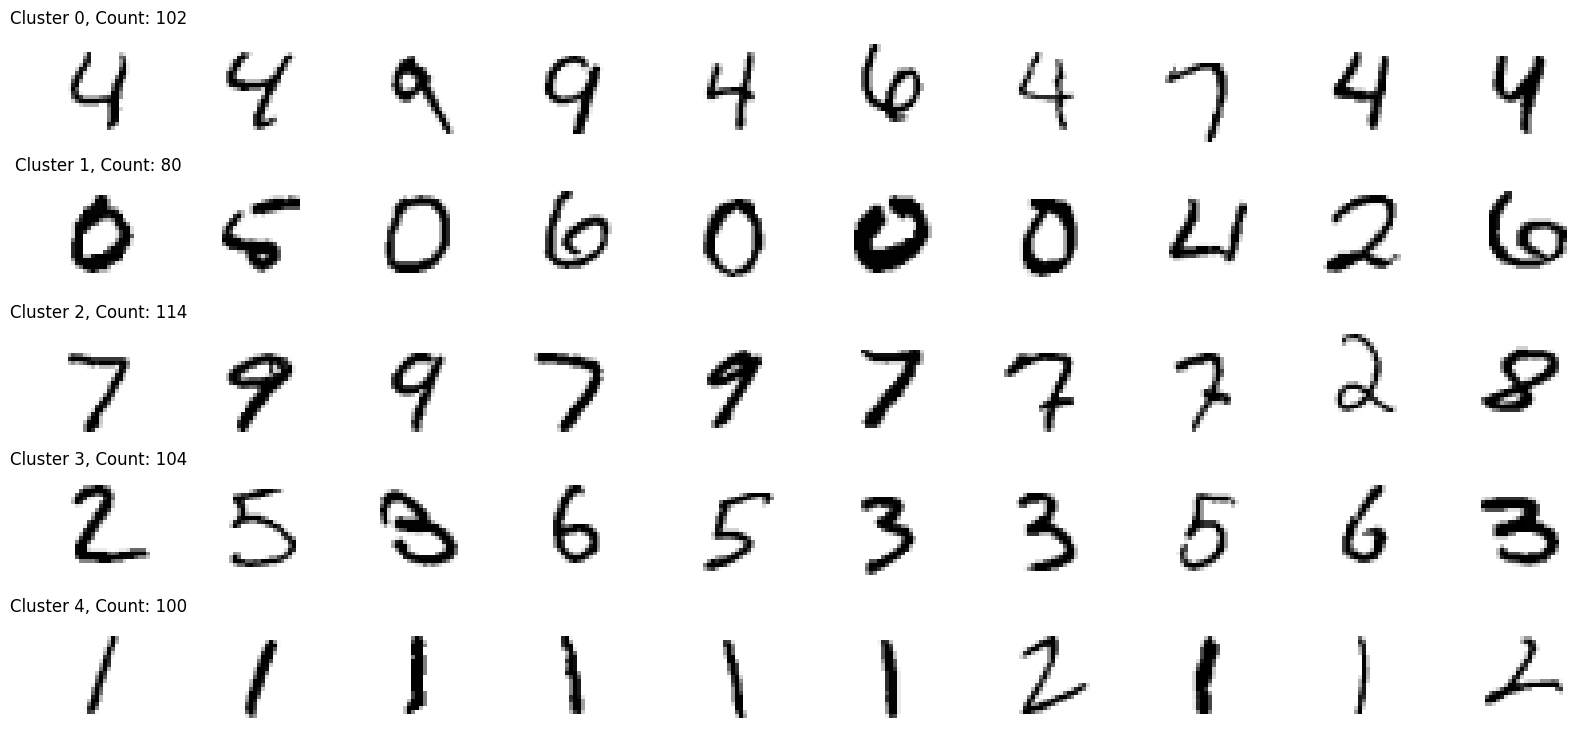

In [114]:

# мітки
labels = kmeans.labels_

unique_labels, counts = np.unique(labels, return_counts=True)

num_cols = 10  # стовпці зображень
num_rows = len(unique_labels)  # рядки по кількості кластерів
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 1.5))

for label, count in zip(unique_labels, counts):
    images_in_cluster = df_mnist[labels == label].drop(0, axis=1).values

    if len(images_in_cluster) == 0:
        continue

    # зображеня
    for i, image in enumerate(images_in_cluster[:num_cols], start=0):
        ax = axes[label, i] if num_rows > 1 else axes[i]
        ax.imshow(image.reshape(28, 28), cmap='binary')
        ax.axis('off')

    # заголовок
    if num_rows > 1:
        axes[label, 0].set_title(f'Cluster {label}, Count: {count}')
    else:
        axes[0].set_title(f'Cluster {label}, Count: {count}')

plt.tight_layout()
plt.show()

# Additional implementation options

### using Patel's approach

In [ ]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

'''Algorithms'''
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# import fastcluster
from scipy.cluster.hierarchy import dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_mnist, test_size=0.2, random_state=42)
validation_set, test_set = train_test_split(test_set, test_size=0.5, random_state=42)


X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]

In [ ]:
# Create Pandas DataFrames from the datasets
train_index = range(0,len(X_train))
validation_index = range(len(X_train), \
                         len(X_train)+len(X_validation))
test_index = range(len(X_train)+len(X_validation), \
                   len(X_train)+len(X_validation)+len(X_test))

X_train = pd.DataFrame(data=X_train,index=train_index)
y_train = pd.Series(data=y_train,index=train_index)

X_validation = pd.DataFrame(data=X_validation,index=validation_index)
y_validation = pd.Series(data=y_validation,index=validation_index)

X_test = pd.DataFrame(data=X_test,index=test_index)
y_test = pd.Series(data=y_test,index=test_index)

In [ ]:
# Principal Component Analysis
from sklearn.decomposition import PCA
import pandas as pd

n_components = min(X_train.shape[0], X_train.shape[1])
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state, svd_solver='auto')

X_train.fillna(X_train.mean(), inplace=True)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)


In [ ]:
# K-means - Inertia as the number of clusters varies
from sklearn.cluster import KMeans
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

n_clusters = 10
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018

kMeans_inertia = pd.DataFrame(data=[],index=range(2,21), \
                              columns=['inertia'])
for n_clusters in range(2,21):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, \
                max_iter=max_iter, tol=tol, random_state=random_state)

    cutoff = 99
    kmeans.fit(X_train_PCA.loc[:,0:cutoff])
    kMeans_inertia.loc[n_clusters] = kmeans.inertia_

<Axes: >

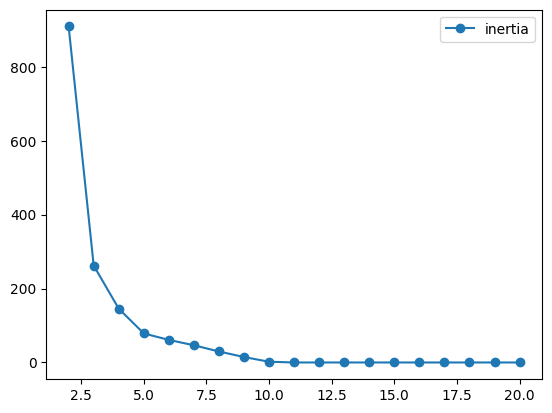

In [ ]:
# Plot inertia relative to k # of clusters
kMeans_inertia.plot(marker='o')